# 2D Simulation :(Heat/Pressure Distribution)

# Problem statement:
Consider the diffusion equation applied to a metal plate initially at temperature Tcold aprt from a disc of a specified size which is at temperature Thot. We suppose that the edges of the plate are held fixed at Tcool.The following code applies the above formula to follow the evolution of the temperature of the plate. It can be shown that the maximum time step, Delta t that we can allow without the process becoming unstable is
Δt=1/2D * (Δx Δy)2/(Δx)2+(Δy)2

Approach 1: Loops.(SLOW)

Approach 2: Vectorization (FAST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.figure(figsize=(10,10))
plt.style.use('default')

<Figure size 1000x1000 with 0 Axes>

In [3]:
#plate size, mm
w=h=10

#intervals in x-, y- directions, mm

dx=dy=0.1
#thermal diffusivity of steel, mm2.s-1
D=4

0 1
10 2
50 3
100 4


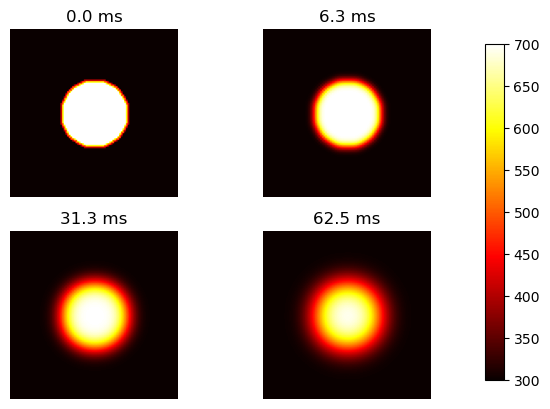

In [11]:
Tcool,Thot=300,700

nx,ny=int(w/dx),int(h/dy)
dx2,dy2=dx*dx, dy*dy
dt=dx2*dy2/(2*D*(dx2+dy2))

uO=Tcool*np.ones((nx,ny))
u=uO.copy()

#initial conditions -ring of inner radius r, width dr centred at(cx,cy) (mm)

r,cx,cy=2,5,5

r2=r*2

for i in range(nx):
    for j in range(ny):
        p2=(i*dx-cx)**2+(j*dy-cy)**2
        if p2<r2:
            uO[i,j]=Thot
            
def do_timestep(uO,u):
    # propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1]=uO[1:-1,1:-1]+D*dt*(
    (uO[2:,1:-1]-2*uO[1:-1,1:-1]+uO[:-2,1:-1])/dx2
    +(uO[1:-1,2:]-2*uO[1:-1,1:-1]+uO[1:-1, :-2])/dy2)
    
    uO=u.copy()
    
    return uO, u

# Number of timesteps

nsteps=101

#output 4 figures at these timesteps

mfig=[0,10,50,100]
fignum=0
fig=plt.figure()
for m in range(nsteps):
    uO,u=do_timestep(uO,u)
    if m in mfig:
        fignum+=1
        print(m,fignum)
        ax=fig.add_subplot(220+fignum)
        im=ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'. format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax=fig.add_axes([0.9,0.15,0.03,0.7])
cbar_ax.set_xlabel('$T$/K',labelpad=20)
fig.colorbar(im,cax=cbar_ax)
plt.show()